# Tutorial #1: TMDB Movie Data Analysis

### Learning objective

**What shall be your key takeaways from this project?**
1. What are some good questions to ask looking at a dataset?
2. Data Wrangling
3. Exploratory Data Analysis
4. Collaborate, visualise, and communicate.


### Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

In [140]:
# Loading the required packages here

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [141]:
# Let's load the dataset and create their dataframes

credits_df = pd.read_csv('./tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
movies_df = pd.read_csv('./tmdb-5000-movie-dataset/tmdb_5000_movies.csv')
credits_df.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Looking at this dataset, we need to define a set of questions.

**Let's define those primary questions here:**
1. Which are the 5 most expensive movies?
2. Top 5 most profitable movies?
3. Most talked about Movies?
4. Average runtime of movies?
5. Movies which are rated above 7 by the critics?
6. Which year did we have the most profitable movies?

**Then there will be a set of seconday questions related to the questions above**
1. Most successful genre.
2. Cast of the profitable movies.
3. Average budget of the profitable movies.
4. Average duration of the most profitable movies.
5. Language of the most profitable movies.

In [142]:
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title']

movies_df = movies_df.drop(del_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [143]:
#  dropping the duplicates from the dataset.
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 12)
(4803, 12)


In [144]:
# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

movies_df.dropna(subset=cols, inplace=True)
movies_df.shape


(3229, 12)

In [145]:
# Changing the release_date column to DateTime column

movies_df.release_date = pd.to_datetime(movies_df['release_date'])
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [146]:
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


In [147]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

# below are the 5 most expensive movies in descending order.

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1865,135.413856,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,1.045714e+09,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1.405404e+09,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Avengers: Age of Ultron,7.3,6767,2015
10,270000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1452,57.925623,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,3.910812e+08,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Superman Returns,5.4,1400,2006
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012


In [148]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()

change_cols=['budget', 'revenue', 'profit']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
#printing the changed information
movies_df.dtypes


# below are the most profitable movies of the dataset

budget                           int64
profit                           int64
revenue                          int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
release_year                     int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

## Since we are looking at the extremes, we can write a generic function which can give us all the results as per our needs

In [149]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
profit,665713802,8499999
revenue,1045713802,8500000
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name..."
id,1865,3082
popularity,135.414,28.2765
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
release_year,2011,1936
runtime,136,87


In [150]:
find_min_max_in('popularity')

,546,3921
budget,74000000,3000000
profit,1082730962,3804016
revenue,1156730962,6804016
genres,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...","[{""id"": 18, ""name"": ""Drama""}]"
id,211672,44634
popularity,875.581,0.019984
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2015-06-17 00:00:00,2004-09-30 00:00:00
release_year,2015,2004
runtime,91,94


In [151]:
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
profit,-17128721,-925977
revenue,871279,4074023
genres,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 99, ""name"": ""Documentary""}]"
id,43434,78394
popularity,1.13838,4.49837
production_countries,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso..."
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010
runtime,338,41


In [152]:
movies_df['genres'].loc[1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [153]:
# Average runtime of movies
 
movies_df['runtime'].mean()

110.72437287085785

In [154]:
# movies rated above 7 

movies_df[movies_df['vote_average'] >= 7.0]

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,2550965087,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2009,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
3,250000000,834939099,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,2012,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
6,260000000,331794936,591794936,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,2010,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tangled,7.4,3330
7,280000000,1125403694,1405403694,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,2015,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Avengers: Age of Ultron,7.3,6767
8,250000000,683959197,933959197,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,2009,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Harry Potter and the Half-Blood Prince,7.4,5293
12,200000000,865659812,1065659812,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",58,145.847379,"[{""iso_3166_1"": ""JM"", ""name"": ""Jamaica""}, {""is...",2006-06-20,2006,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Pirates of the Caribbean: Dead Man's Chest,7.0,5246
16,220000000,1299557910,1519557910,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",24428,144.448633,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,2012,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Avengers,7.4,11776
19,250000000,706019788,956019788,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",122917,120.965743,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2014-12-10,2014,144.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Hobbit: The Battle of the Five Armies,7.1,4760
22,250000000,708400000,958400000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",57158,94.370564,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",2013-12-11,2013,161.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Hobbit: The Desolation of Smaug,7.6,4524
25,200000000,1645034188,1845034188,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",597,100.025899,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-11-18,1997,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Titanic,7.5,7562


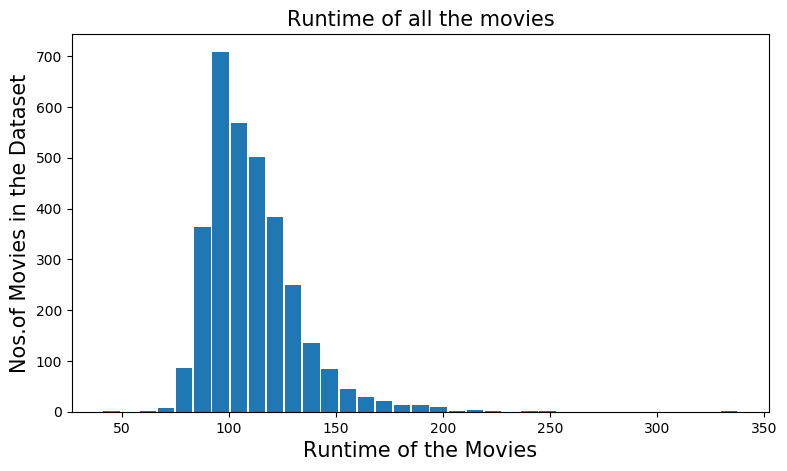

In [155]:
# Year we had the most number of profitable movies.
# we'll first have to define a profitable movies

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(movies_df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()


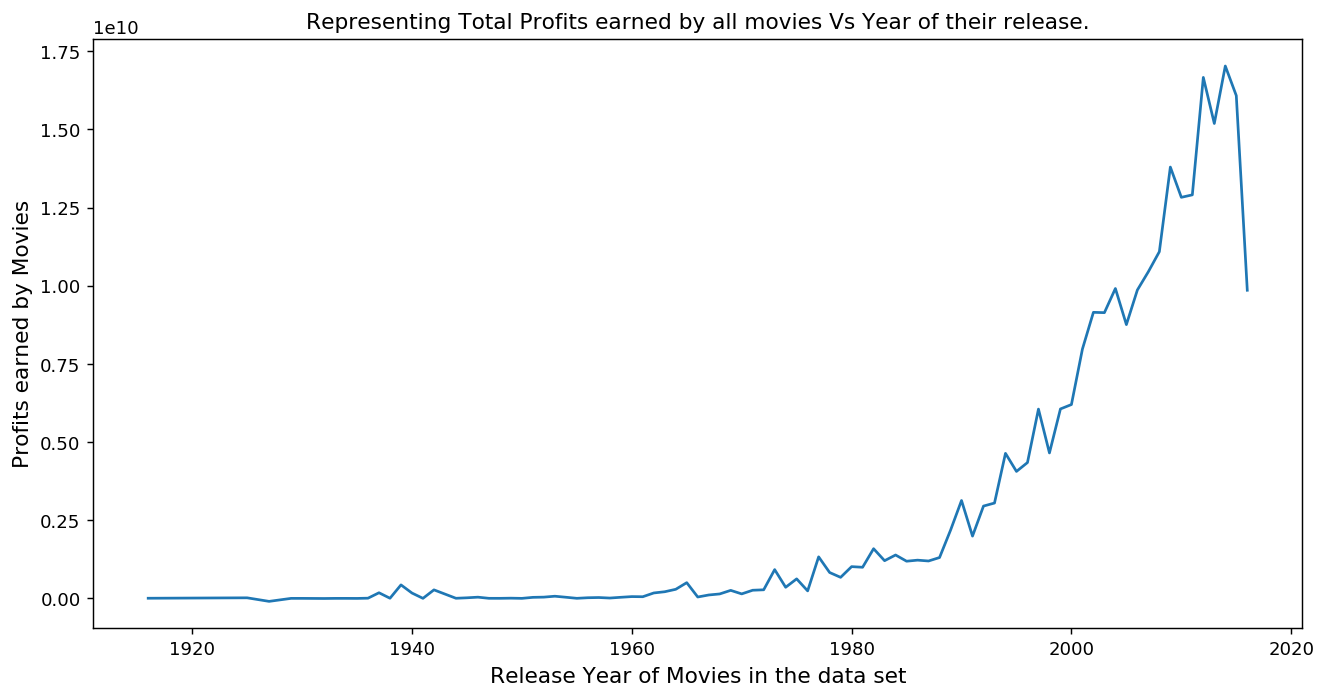

In [156]:
profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [157]:
profits_year.idxmax()

2014

In [158]:
#selecting the movies having profit $50M or more
profit_data = movies_df[movies_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,title,vote_average,vote_count
1,237000000,2550965087,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2009,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
2,300000000,661000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,2007,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
3,245000000,635674609,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,2015,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466


In [161]:
import ast, json

# movies_df.apply(json.loads)
for index,i in zip(movies_df.index,movies_df['genres'].apply(json.loads)):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies_df.loc[index,'genres']=str(list1)


In [162]:

movies_df['genres']=movies_df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_df['genres']=movies_df['genres'].str.split(',')

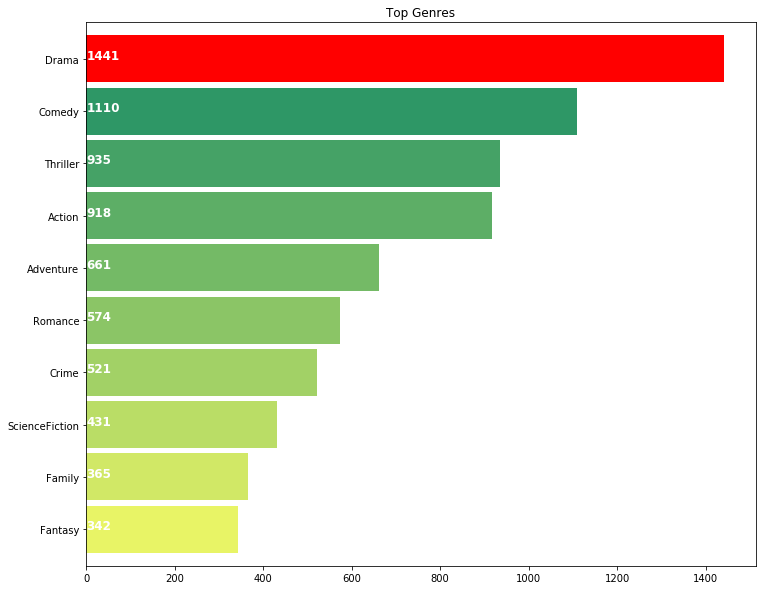

In [163]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies_df['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

